In [1]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import csv

# hpi detrend to find boom and bust 
output = pd.read_csv('../A_new-run/ltv_is_0.8/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years = output[3001:].reset_index()

hpi=_50_years[['Sale HPI']]
hpa = _50_years[['Sale AnnualHPA']]

hpi['Rental HPI'] = _50_years[['Rental HPI']]

hpi

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/2810233302.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi['Rental HPI'] = _50_years[['Rental HPI']]


,Sale HPI,Rental HPI
0,0.8754,1.0232
1,0.9032,1.0326
2,0.9175,1.0239
3,0.9590,1.0229
4,0.9739,1.0231
...,...,...
595,0.7953,0.9795
596,0.8170,0.9849
597,0.7222,0.9709
598,0.7776,0.9900


<AxesSubplot:>

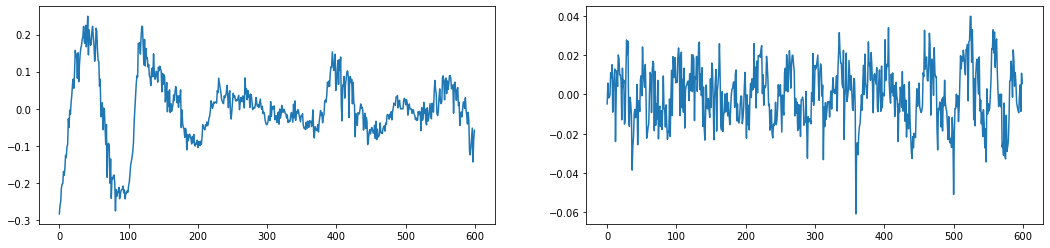

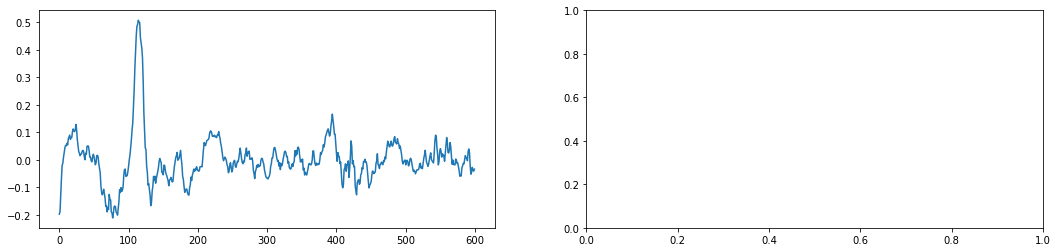

In [2]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sale_cycle,sale_trend = hpfilter(hpi['Sale HPI'], lamb=129600)
rental_cycle,rental_trend = hpfilter(hpi['Rental HPI'], lamb=129600)
hpa_cycle, hpa_trend = hpfilter(hpa['Sale AnnualHPA'], lamb=129600)

fig, axes = plt.subplots(figsize=(18,4), nrows=1, ncols=2)
sale_cycle.plot(ax=axes[0])
rental_cycle.plot(ax=axes[1])

fig2, axes2 = plt.subplots(figsize=(18,4), nrows=1, ncols=2)
hpa_cycle.plot(ax=axes2[0])

<AxesSubplot:title={'center':'(a)'}>

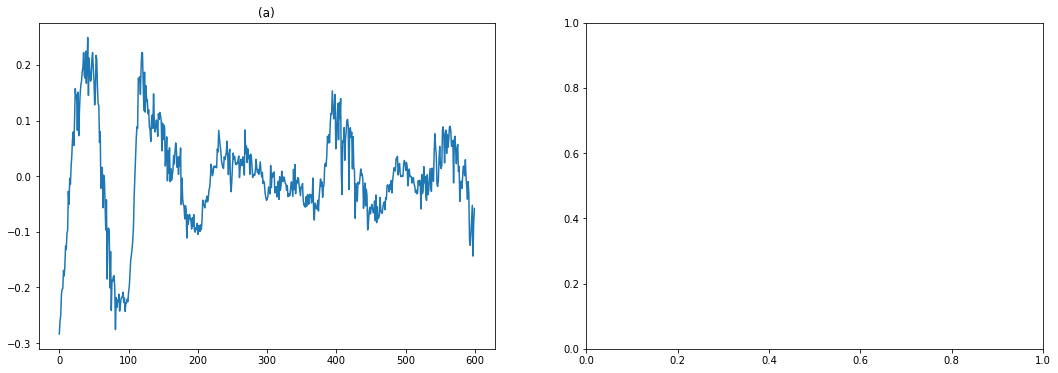

In [3]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
sale_cycle.plot(ax=axes[0], title='(a)')

In [4]:
# find peaks of a
sale_cycle.sort_values(ascending=False)

41     0.249280
38     0.224738
119    0.222250
48     0.222040
35     0.221912
         ...   
95    -0.242953
2     -0.250476
1     -0.260256
81    -0.275488
0     -0.283534
Name: Sale HPI_cycle, Length: 600, dtype: float64

In [5]:

part1_ = sale_cycle.iloc[100:200]
part1_.sort_values(ascending=False)

119    0.222250
120    0.221619
118    0.193992
123    0.186764
116    0.178618
         ...   
104   -0.140273
103   -0.151484
102   -0.175814
101   -0.197489
100   -0.207531
Name: Sale HPI_cycle, Length: 100, dtype: float64

In [6]:
# bust
part3_40 = sale_cycle.iloc[150:250]
part3_40.sort_values(ascending=True)

184   -0.111004
200   -0.104551
196   -0.100652
203   -0.099281
195   -0.096295
         ...   
231    0.068418
155    0.070672
230    0.082322
152    0.085529
151    0.091478
Name: Sale HPI_cycle, Length: 100, dtype: float64

In [7]:

import math

raw_data40 = pd.DataFrame()

step = 0

with open('../A_new-run/ltv_is_0.8/HousingWealth-run1.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        c_array=[]
        for i in range(0, len(row)):
            c_array.append(float(row[i]))
        
        c_array.sort(reverse=True)
        c_series = pd.Series(c_array)
        
        
        if (step == 0):
            raw_data40= pd.DataFrame(c_series)
        else:
            raw_data40 = pd.concat([raw_data40,c_series],axis=1)
        
        step +=1 

#outpath = 'output_simulation40_p80_p20.csv'
#raw_data40.to_csv(outpath,sep=';',index=False,header=True)
raw_data40

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,10641724.06,9025170.51,8326422.01,6438737.19,6033662.39,6175742.83,6774372.53,7387358.01,7983335.34,6603899.05,...,4419044.14,5167547.12,6241483.82,7051921.57,8152250.56,9878803.49,10546873.52,9524271.68,6760422.17,5609603.85
1,8995828.46,7644809.51,6758395.23,5225700.49,4896935.77,5139384.65,5715427.48,6594120.24,6809583.27,6188860.69,...,4112655.68,4531019.06,4639860.86,5197269.31,5513249.57,5841980.25,6242689.44,6004373.99,5683714.35,4920673.39
2,6917257.02,5898495.64,5243998.79,4099604.09,3854422.82,3951867.59,4335329.58,4550435.16,4705506.12,4282030.76,...,3973533.55,4051906.85,3938431.92,4709881.93,5015594.77,5233402.56,5584755.12,5107760.52,4919451.55,4521162.55
3,6486334.30,5510009.65,4866199.14,3746301.25,3507042.37,3566559.32,3927890.88,3892823.55,4099464.50,3874713.13,...,3456277.18,3443993.86,3548363.68,3904018.49,4180499.74,4456749.57,5057980.08,5066405.29,4857433.00,4198238.30
4,5884228.92,5160402.48,4579323.43,3290144.48,3093630.53,3158725.35,3273999.70,3653634.02,3867140.28,3638857.23,...,3398246.57,3271506.01,3496712.06,3796426.00,3886280.81,4307637.49,4852103.88,4632442.39,4134724.65,3470250.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,-93517.16,NaN,NaN,-93414.00,NaN,NaN,-103133.10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011,NaN,NaN,NaN,-126420.30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# top 10% /20% total wealth share

wealth_share_table40 = pd.DataFrame(columns=['10%total','10%share','20%total','20%share', '30%share'])

index_ = 0
for key,col in raw_data40.iteritems():
    filtered = col[col[:].notna()]
    len_ = len(filtered)
    # print(len(filtered))
    index_10 = round(len_ * 0.1)
    index_20 = round(len_ * 0.2)
    index_30 = round(len_ * 0.3)
    
    sum_ = filtered.sum()
    
    sum_10 = 0
    sum_20 = 0
    sum_30 = 0
    
    for val in range(0,index_10):
        sum_10 += col[val]
        
    for val2 in range(0, index_20):
        sum_20 += col[val2]
    
    for val3 in range(0, index_30):
        sum_30 += col[val3]
    
    wealth_share_table40.loc[index_] = [sum_10,sum_10/sum_ * 100,sum_20,sum_20/sum_ * 100, sum_30/sum_ * 100]
     
    index_ +=1
    #print(key)
      
wealth_share_table40

,10%total,10%share,20%total,20%share,30%share
0,9.687739e+08,48.690028,1.341498e+09,67.422917,79.832634
1,8.207202e+08,49.287441,1.135207e+09,68.173614,80.618455
2,7.262020e+08,49.852493,1.004044e+09,68.925872,81.433089
3,5.559908e+08,51.146037,7.671822e+08,70.573711,83.235020
4,5.262710e+08,51.680242,7.260521e+08,71.298908,83.980439
...,...,...,...,...,...
213,7.443010e+08,48.183552,1.038765e+09,67.246153,79.801616
214,8.071384e+08,48.283232,1.125511e+09,67.328382,79.851904
215,7.775615e+08,48.594615,1.083373e+09,67.706693,80.231973
216,7.162882e+08,48.909769,9.979416e+08,68.141698,80.679984


In [9]:
fig_data40 = wealth_share_table40.iloc[168:218].reset_index()
fig_data40


,index,10%total,10%share,20%total,20%share,30%share
0,168,8.737589e+08,48.493591,1.216433e+09,67.511989,79.919550
1,169,1.131841e+09,48.679642,1.574222e+09,67.706119,79.954129
2,170,1.210080e+09,49.079212,1.681808e+09,68.211891,80.424518
3,171,1.144292e+09,49.339201,1.591034e+09,68.601670,80.798545
4,172,9.443486e+08,49.783209,1.312839e+09,69.208935,81.496717
5,173,6.579789e+08,51.206095,9.112107e+08,70.913427,83.321760
6,174,4.570561e+08,53.610711,6.285679e+08,73.728300,86.340058
7,175,4.298881e+08,53.903571,5.918478e+08,74.211659,86.860447
8,176,5.526996e+08,50.744345,7.681610e+08,70.526248,83.117109
9,177,8.761077e+08,49.305017,1.222821e+09,68.817130,81.173782


<AxesSubplot:>

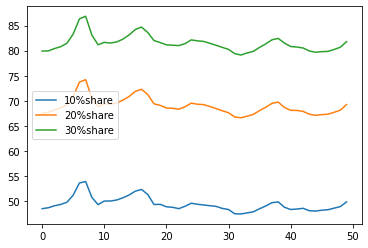

In [10]:

fig, ax = plt.subplots()
fig_data40[['10%share','20%share','30%share']][:].plot(ax=ax)

#plt.vlines(203, ymin=0,ymax=0.5,ls='--',color='red',label='booms')
#plt.vlines(311, ymin=0,ymax=0.5,ls='--',color='green',label='busts')
#plt.vlines(498, ymin=0,ymax=0.5,ls='--',color='green',label='busts')
#plt.vlines(167, ymin=0,ymax=0.5,ls='--',color='red',label='booms')
#plt.vlines(254, ymin=0,ymax=0.5,ls='--',color='red',label='booms')
#plt.vlines(350, ymin=0,ymax=0.5,ls='--',color='green',label='busts')
# plt.vlines(37, ymin=0,ymax=0.5,ls='--',color='yellow',label='stable')
#plt.show()

In [11]:
outpath = 'right_ltv_0.8.csv'
fig_data40.to_csv(outpath,sep=';',index=False,header=True)

<AxesSubplot:title={'center':'Detrended cycles of (a)'}>

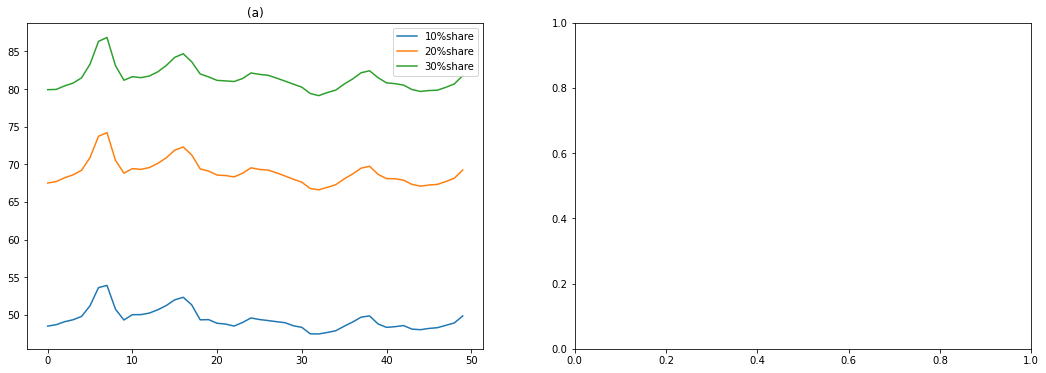

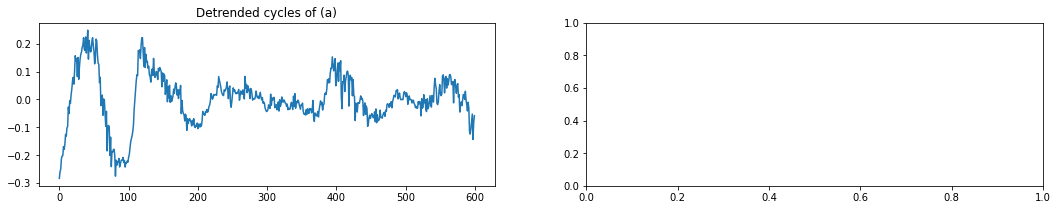

In [12]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)

fig_40 = wealth_share_table40.iloc[168:218].reset_index()
fig_40[['10%share','20%share','30%share']][:].plot(ax=axes[0],title='(a)')


fig2, axes2 = plt.subplots(figsize=(18,3), nrows=1, ncols=2)
sale_cycle.plot(ax=axes2[0], title='Detrended cycles of (a)')


In [13]:
#bottom 10% 20% 30% 

raw_inverse_40 = pd.DataFrame()

step = 0

with open('../A_new-run/ltv_is_0.8/HousingWealth-run1.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        c_array=[]
        for i in range(0, len(row)):
            c_array.append(float(row[i]))
        
        c_array.sort()
        c_series = pd.Series(c_array)
        
       
        if (step == 0):
            raw_inverse_40= pd.DataFrame(c_series)
        else:
            raw_inverse_40 = pd.concat([raw_inverse_40,c_series],axis=1)
        
        step +=1 

wealth_inverse_40 = pd.DataFrame(columns=['10%total','10%share','20%total','20%share', '30%share'])

index_ = 0
for key,col in raw_inverse_40.iteritems():
    filtered = col[col[:].notna()]
    len_ = len(filtered)
    # print(len(filtered))
    index_10 = round(len_ * 0.1)
    index_20 = round(len_ * 0.2)
    index_30 = round(len_ * 0.3)
    
    sum_ = filtered.sum()
    
    sum_10 = 0
    sum_20 = 0
    sum_30 = 0
    
    for val in range(0,index_10):
        sum_10 += col[val]
        
    for val2 in range(0, index_20):
        sum_20 += col[val2]
    
    for val3 in range(0, index_30):
        sum_30 += col[val3]
    
    wealth_inverse_40.loc[index_] = [sum_10,sum_10/sum_ * 100,sum_20,sum_20/sum_ * 100, sum_30/sum_ * 100]
     
    index_ +=1
    #print(key)
      
# wealth_share_table40

fig_40 = wealth_inverse_40.iloc[168:218].reset_index()


In [14]:
fig_40

,index,10%total,10%share,20%total,20%share,30%share
0,168,-24586.72,-0.001365,-24586.72,-0.001365,-0.001365
1,169,0.00,0.000000,0.00,0.000000,0.000000
2,170,-17631.16,-0.000715,-17631.16,-0.000715,-0.000715
3,171,-82102.05,-0.003540,-82102.05,-0.003540,-0.003540
4,172,-479431.14,-0.025274,-479431.14,-0.025274,-0.025274
5,173,-4572198.06,-0.355824,-4572198.06,-0.355824,-0.355824
6,174,-12887524.89,-1.511651,-12887524.89,-1.511651,-1.511651
7,175,-12843922.22,-1.610496,-12843922.22,-1.610496,-1.610496
8,176,-4133622.63,-0.379515,-4133622.63,-0.379515,-0.379515
9,177,-185492.24,-0.010439,-185492.24,-0.010439,-0.010439


In [15]:
# fig_40  fig_data40
for i,row in fig_40.iterrows():
    fig_40.loc[i]['P80/P20'] =  fig_data40.loc[i]['20%total'] / row['20%total']


fig_40

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/4019572983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_40.loc[i]['P80/P20'] =  fig_data40.loc[i]['20%total'] / row['20%total']
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/4019572983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_40.loc[i]['P80/P20'] =  fig_data40.loc[i]['20%total'] / row['20%total']
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/4019572983.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  fig_40.loc[i]['P80/P20'] =  fig_data40.loc[i]['20%total'] / row['20%total

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/4019572983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_40.loc[i]['P80/P20'] =  fig_data40.loc[i]['20%total'] / row['20%total']
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/4019572983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_40.loc[i]['P80/P20'] =  fig_data40.loc[i]['20%total'] / row['20%total']
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/4019572983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

,index,10%total,10%share,20%total,20%share,30%share
0,168,-24586.72,-0.001365,-24586.72,-0.001365,-0.001365
1,169,0.00,0.000000,0.00,0.000000,0.000000
2,170,-17631.16,-0.000715,-17631.16,-0.000715,-0.000715
3,171,-82102.05,-0.003540,-82102.05,-0.003540,-0.003540
4,172,-479431.14,-0.025274,-479431.14,-0.025274,-0.025274
5,173,-4572198.06,-0.355824,-4572198.06,-0.355824,-0.355824
6,174,-12887524.89,-1.511651,-12887524.89,-1.511651,-1.511651
7,175,-12843922.22,-1.610496,-12843922.22,-1.610496,-1.610496
8,176,-4133622.63,-0.379515,-4133622.63,-0.379515,-0.379515
9,177,-185492.24,-0.010439,-185492.24,-0.010439,-0.010439


<AxesSubplot:title={'center':'Detrended cycles of (a)'}>

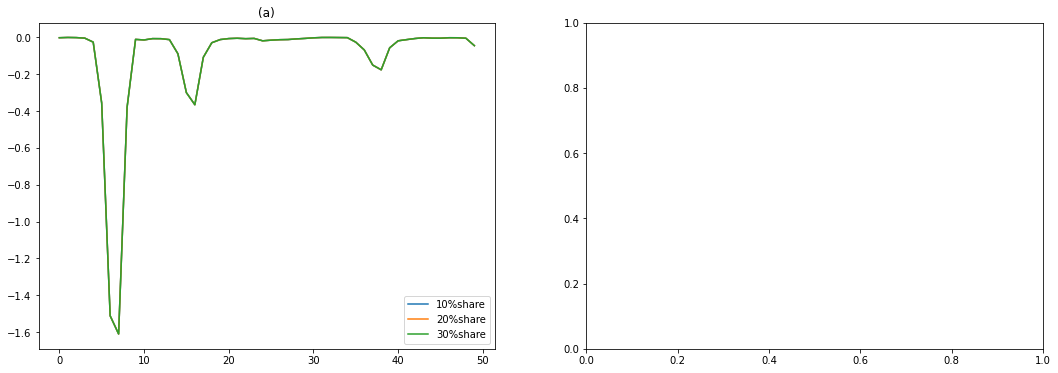

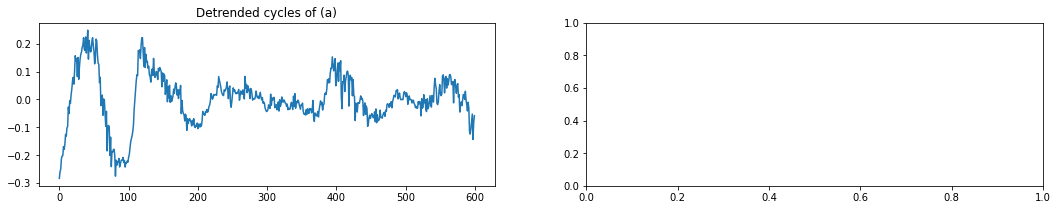

In [16]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)

fig_40 = wealth_inverse_40.iloc[168:218].reset_index()
fig_40[['10%share','20%share','30%share']][:].plot(ax=axes[0],title='(a)')

fig2, axes2 = plt.subplots(figsize=(18,3), nrows=1, ncols=2)
sale_cycle.plot(ax=axes2[0], title='Detrended cycles of (a)')

In [17]:
# gini coefficient

def gini(x):
    total = 0
    for i,xi in enumerate(x[:-1],1):
        total += np.sum(np.abs(xi - x[i:]))
        
    return total/(len(x)**2 * np.mean(x))


index_1 = 0


for key,col in raw_inverse_40.iteritems():
    filtered = col[col[:].notna()]
    gini_ = gini(filtered)
    # print(gini_)
    wealth_inverse_40.loc[[index_1],['Gini Coefficient']] = gini_
    index_1 +=1
    

#outpath = 'right_ltv_0.8_gini.csv'
#wealth_inverse_40.to_csv(outpath,sep=';',index=False,header=True)

<AxesSubplot:title={'center':'Gini Coefficient of (a)'}>

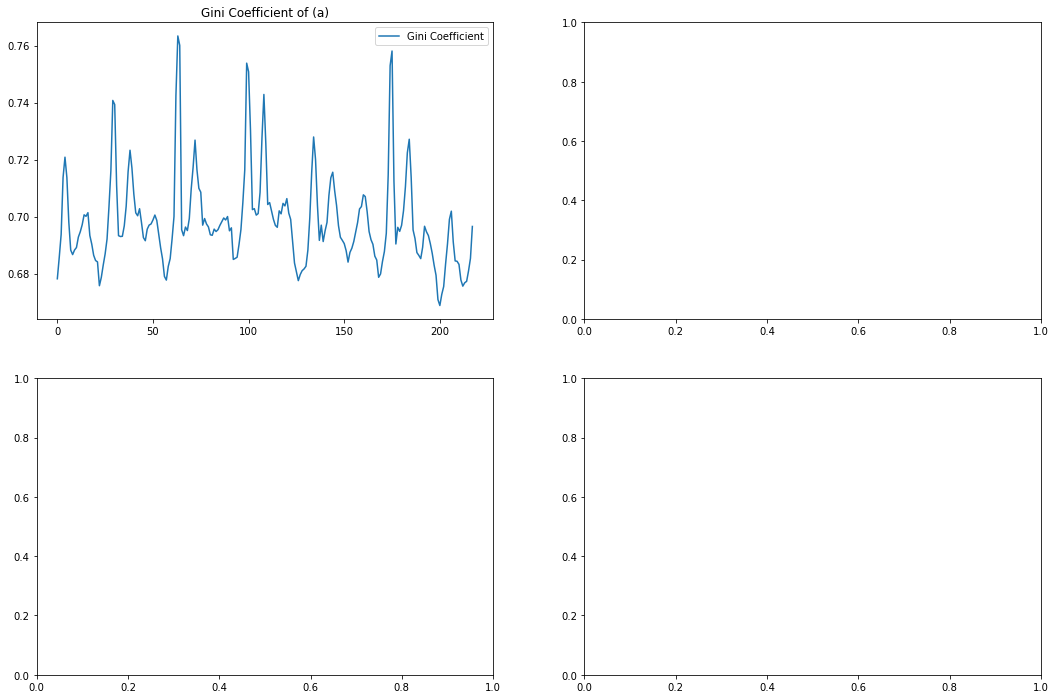

In [18]:


fig, axes = plt.subplots(figsize=(18,12), ncols=2, nrows=2)
wealth_inverse_40[['Gini Coefficient']][:].plot(ax=axes[0,0],title='Gini Coefficient of (a)')

In [19]:

cut_40 = output.iloc[3001:3700].reset_index()
cut_40

composition_40 = pd.DataFrame(columns=['period','NonBTLOwnerOccupier','BTLOwnerOccupier', 'ActiveBTL', 'Renter', 'Homeless'])
averageOO = round(cut_40.loc[:]['nNonBTLOwnerOccupier'].mean())
averageBTLOO = round(cut_40.loc[:]['nBTLOwnerOccupier'].mean())
averageBTL = round(cut_40.loc[:]['nActiveBTL'].mean())
averageRenter = round(cut_40.loc[:]['nRenting'].mean())
averageHomeless = round(cut_40.loc[:]['nHomeless'].mean())
# averageBankrupt = cut_40.loc[:]['nBTLBankrupt'].mean() + cut_40.loc[:]['nNonBTLBankrupt'].mean()

composition_40.loc[0]=['average',averageOO,averageBTLOO, averageBTL,averageRenter,averageHomeless]


arr = [203,311,498]
for i in range(1,4):
    c_index = arr[i-1]
    OO = int(cut_40.loc[c_index]['nNonBTLOwnerOccupier'])
    BTLOO = int(cut_40.loc[c_index]['nBTLOwnerOccupier'])
    BTL = int(cut_40.loc[c_index]['nActiveBTL'])
    Renter = int(cut_40.loc[c_index]['nRenting'])
    Homeless = int(cut_40.loc[c_index]['nHomeless'])
    composition_40.loc[i]=['boom'+str(i),OO,BTLOO,BTL,Renter,Homeless]
    
arr = [167,254,350]
for i in range(1,4):
    c_index = arr[i-1]
    OO = int(cut_40.loc[c_index]['nNonBTLOwnerOccupier'])
    BTLOO = int(cut_40.loc[c_index]['nBTLOwnerOccupier'])
    BTL = int(cut_40.loc[c_index]['nActiveBTL'])
    Renter = int(cut_40.loc[c_index]['nRenting'])
    Homeless = int(cut_40.loc[c_index]['nHomeless'])
    composition_40.loc[i+3]=['bust'+str(i),OO,BTLOO,BTL,Renter,Homeless]
    
composition_40

,period,NonBTLOwnerOccupier,BTLOwnerOccupier,ActiveBTL,Renter,Homeless
0,average,5032,380,789,2115,1690
1,boom1,4765,378,815,2374,1674
2,boom2,5076,366,802,2075,1686
3,boom3,5094,384,774,2144,1611
4,bust1,4916,400,789,2203,1697
5,bust2,5141,375,796,2058,1634
6,bust3,5135,359,809,2001,1700


In [20]:
#outpath = 'right_lti_sector40.csv'
#composition_40.to_csv(outpath,sep=';',index=False,header=True)

<AxesSubplot:>

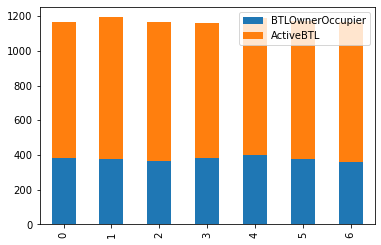

In [21]:
composition_40[['BTLOwnerOccupier','ActiveBTL']][:].plot.bar(stacked=True)

<AxesSubplot:>

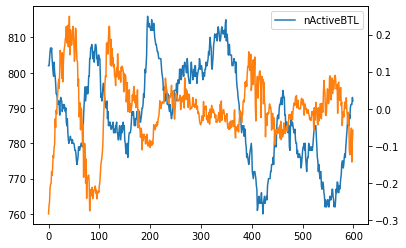

In [22]:
ax = cut_40[['nActiveBTL']][:].plot()
sale_cycle.plot(secondary_y=True, ax=ax)

<AxesSubplot:title={'center':'LTI Limit'}>

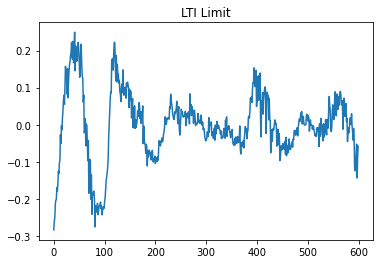

In [23]:
sale_cycle.plot(title='LTI Limit')

<AxesSubplot:>

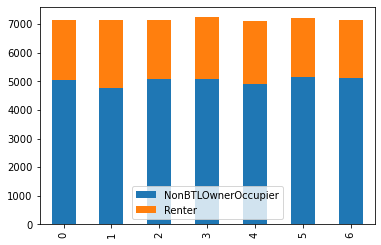

In [24]:
composition_40[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True)

<AxesSubplot:title={'center':'(a)'}>

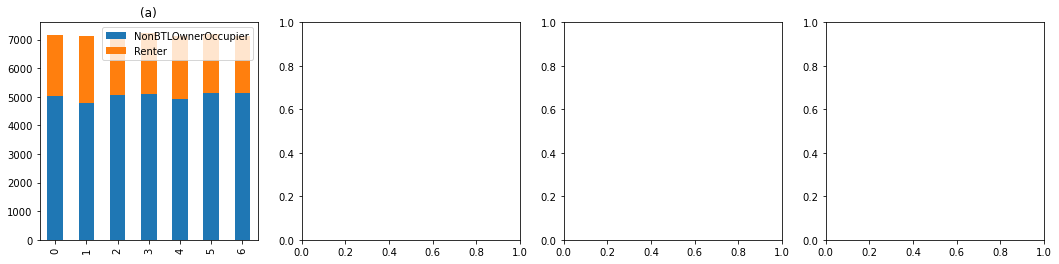

In [25]:


fig, axes = plt.subplots(figsize=(18,4), ncols=4, nrows=1)

composition_40[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True, ax=axes[0],title='(a)')
#composition_30[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True, ax=axes[1],title='(b)')
#composition_20[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True, ax=axes[2],title='(c)')
#composition_10[['NonBTLOwnerOccupier','Renter']][:].plot.bar(stacked=True, ax=axes[3],title='(d)')

<AxesSubplot:>

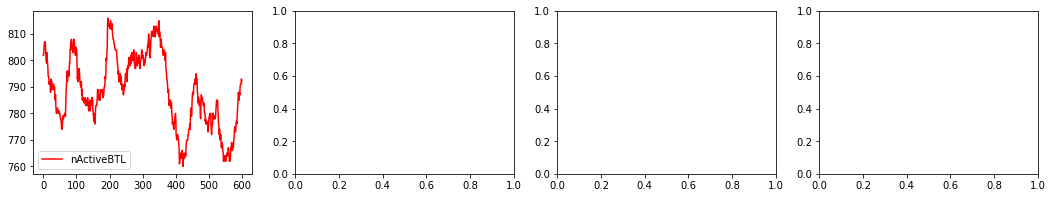

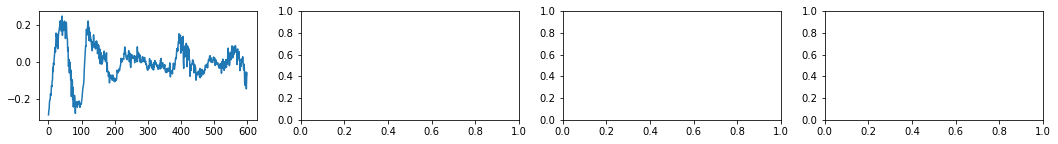

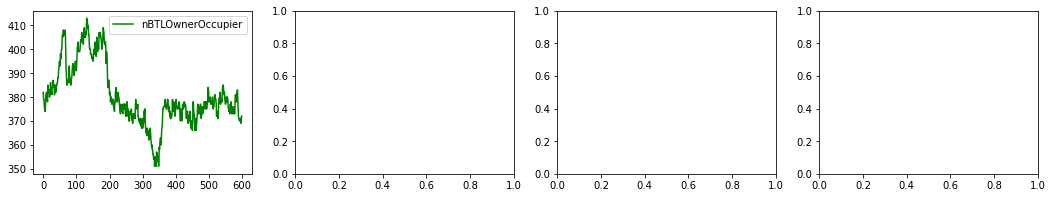

In [26]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nActiveBTL']][:].plot(ax=axes[0], color='red')

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nBTLOwnerOccupier']][:].plot(ax=axes2[0],color='green')

<AxesSubplot:>

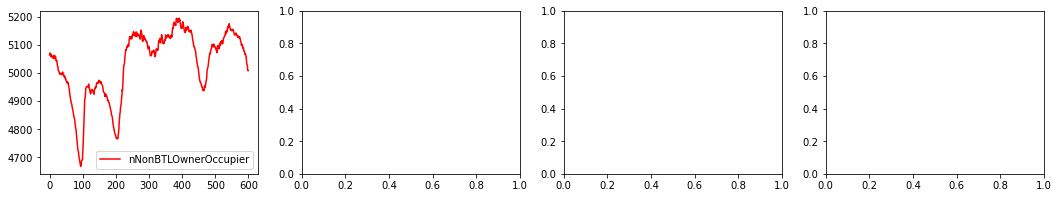

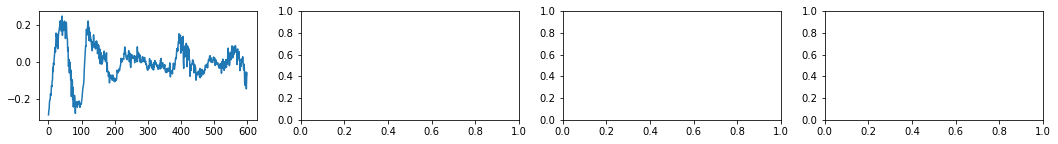

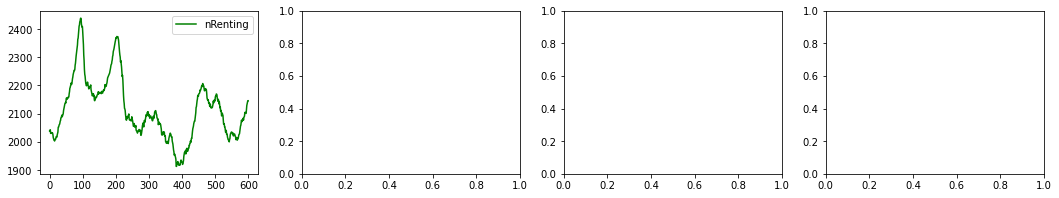

In [27]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nNonBTLOwnerOccupier']][:].plot(ax=axes[0], color='red')

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])


fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nRenting']][:].plot(ax=axes2[0],color='green')



<AxesSubplot:xlabel='period'>

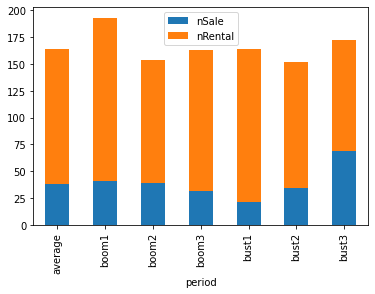

In [28]:
salerental_40 = pd.DataFrame(columns=['period','nSale','nRental'])
averageSales = cut_40.loc[:]['Sale nSales'].mean()
averageRent = cut_40.loc[:]['Rental nSales'].mean()

salerental_40.loc[0]=['average',averageSales,averageRent]


arr = [203,311,498]
for i in range(1,4):
    c_index = arr[i-1]
    OO = cut_40.loc[c_index]['Sale nSales']
    OOBTL = cut_40.loc[c_index]['Rental nSales']
    salerental_40.loc[i]=['boom'+str(i),OO,OOBTL]
    
arr = [167,254,350]
for i in range(1,4):
    c_index = arr[i-1]
    OO = cut_40.loc[c_index]['Sale nSales']
    OOBTL = cut_40.loc[c_index]['Rental nSales']
    salerental_40.loc[i+3]=['bust'+str(i),OO,OOBTL]
    
salerental_40.plot.bar(stacked=True, x='period')

<AxesSubplot:>

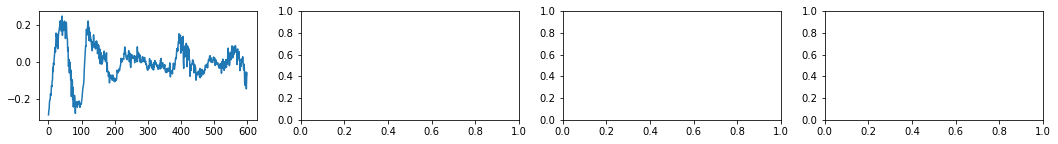

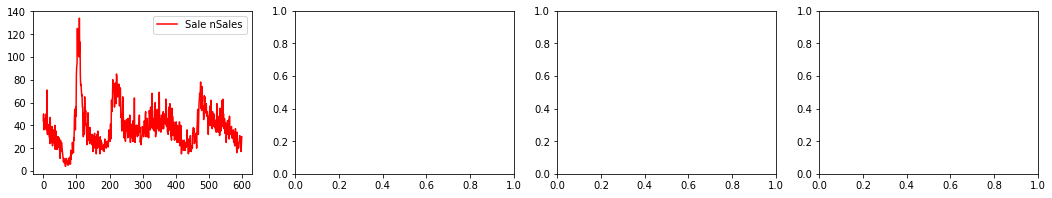

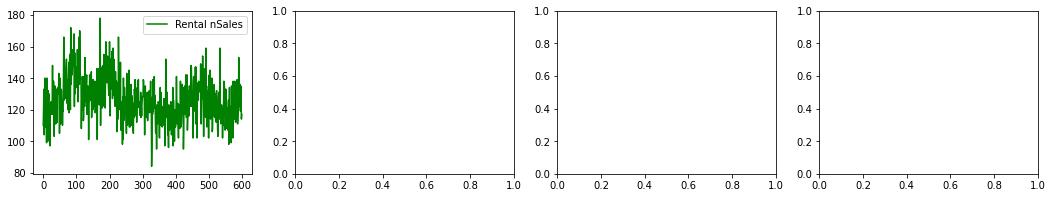

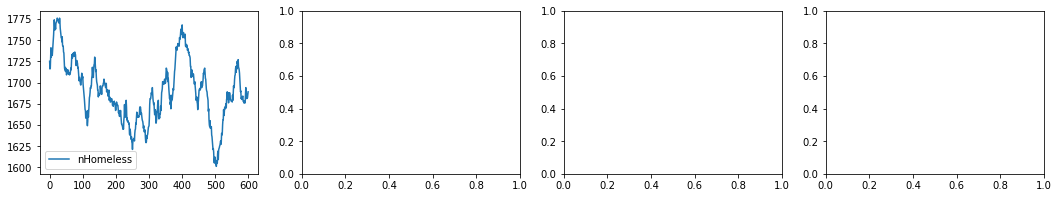

In [29]:
fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])


fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['Sale nSales']][:].plot(ax=axes[0], color='red')


fig2, axes2 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['Rental nSales']][:].plot(ax=axes2[0],color='green')


fig4, axes4 = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

cut_40[['nHomeless']][:].plot(ax=axes4[0])

In [30]:

saleTransaction40 = pd.read_csv('../A_new-run/ltv_is_0.8/SaleTransactions-run1.csv',sep=';',skipinitialspace=True)

saleTransaction40.shape

(99236, 30)

In [31]:
initial = np.zeros((3601,3))

HM_loan_table40 = pd.DataFrame(initial, columns=['loan', 'nonLoan', 'loanRatio'])

loan_data40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == False) & (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1  
count = 0

for index,row in loan_data40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            HM_loan_table40.loc[[row['modelTime']],['loan']] = count
        
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1
         
non_loan_data40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == False) & (saleTransaction40.mortgagePrincipal == 0)]

c_modelTime = -1 
count = 0

for index,row in non_loan_data40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
         
            HM_loan_table40.loc[[row['modelTime']],['nonLoan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            count +=1

for index,row in HM_loan_table40.iterrows():
    if (row['loan'] + row['nonLoan'] != 0):
        HM_loan_table40.loc[[index],['loanRatio']] = row['loan'] / (row['loan'] + row['nonLoan'])

HM_loan_table40

,loan,nonLoan,loanRatio
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
3596,0.0,10.0,0.0
3597,0.0,12.0,0.0
3598,0.0,16.0,0.0
3599,0.0,7.0,0.0


In [32]:
cut_loan40 = HM_loan_table40.iloc[3001:3601]
# HM_loan_table.loc[3600]
cut_loan40

,loan,nonLoan,loanRatio
3001,4.0,11.0,0.266667
3002,4.0,18.0,0.181818
3003,6.0,15.0,0.285714
3004,12.0,8.0,0.600000
3005,5.0,13.0,0.277778
...,...,...,...
3596,0.0,10.0,0.000000
3597,0.0,12.0,0.000000
3598,0.0,16.0,0.000000
3599,0.0,7.0,0.000000


In [33]:
yearly_hm_loan40 = pd.DataFrame(np.zeros((50,2)), columns=['loan', 'nonLoan'])

monthly = 1
countloan = 0
countnonloan = 0
count = 0
for index,row in cut_loan40.iterrows():
    if (monthly % 12 == 0):
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
        
        yearly_hm_loan40.loc[count] = [countloan, countnonloan]
        count +=1
        
        countloan = 0
        countnonloan = 0
        monthly = 1
    else:
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
    
    
yearly_hm_loan40

,loan,nonLoan
0,86.0,163.0
1,77.0,129.0
2,59.0,118.0
3,52.0,123.0
4,6.0,133.0
5,0.0,16.0
6,0.0,5.0
7,2.0,54.0
8,104.0,332.0
9,207.0,307.0


In [34]:
yearly_hm_loan40[:]['nonLoan'].mean()

153.18

In [35]:
x = HM_loan_table40.iloc[3001:3013]

In [36]:
x = HM_loan_table40.iloc[3001:3013]
m = x[:]['loan'].sum()
m

86.0

<AxesSubplot:>

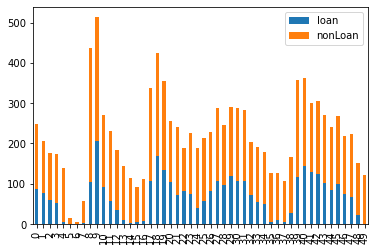

In [37]:
yearly_hm_loan40.plot.bar(stacked=True)

<AxesSubplot:>

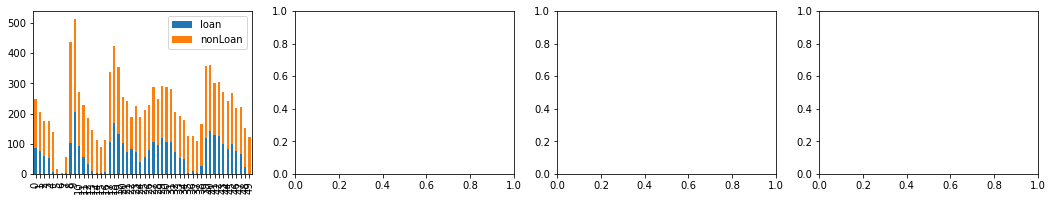

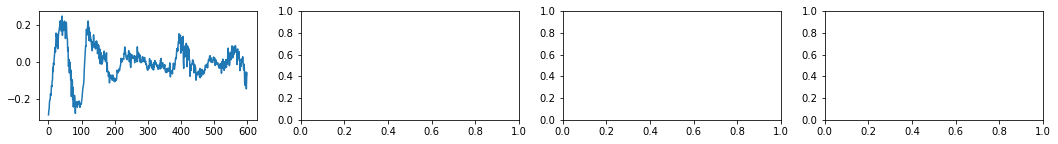

In [38]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

yearly_hm_loan40.plot.bar(stacked=True, ax=axes[0])


fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

In [39]:


initial = np.zeros((3601,2))

ftb_40 = pd.DataFrame(initial, columns=['loan', 'nonLoan'])

loan_ftb40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == True) & (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1 
count = 0

for index,row in loan_ftb40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            ftb_40.loc[[row['modelTime']],['loan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1
         
non_loan_ftb40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == True) & (saleTransaction40.mortgagePrincipal == 0)]

c_modelTime = -1  
count = 0

for index,row in non_loan_ftb40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            ftb_40.loc[[row['modelTime']],['nonLoan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            count +=1


cut_ftb40 = ftb_40.iloc[3001:3601]

yearly_ftb_loan40 = pd.DataFrame(np.zeros((50,2)), columns=['loan', 'nonLoan'])

monthly = 1
countloan = 0
countnonloan = 0
count = 0
for index,row in cut_ftb40.iterrows():
    if (monthly % 12 == 0):
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
        
        yearly_ftb_loan40.loc[count] = [countloan, countnonloan]
        count +=1
        
        countloan = 0
        countnonloan = 0
        monthly = 1
    else:
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
    
    
yearly_ftb_loan40

,loan,nonLoan
0,94.0,12.0
1,67.0,5.0
2,65.0,8.0
3,57.0,14.0
4,12.0,13.0
5,2.0,2.0
6,0.0,1.0
7,13.0,27.0
8,303.0,55.0
9,156.0,18.0


In [40]:
yearly_ftb_loan40[:]['nonLoan'].mean()

15.18

In [41]:

initial = np.zeros((3601,2))

btl_40 = pd.DataFrame(initial, columns=['loan', 'nonLoan'])

loan_btl40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == True) & 
                 (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1 
count = 0

for index,row in loan_btl40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            btl_40.loc[[row['modelTime']],['loan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            count +=1
         
non_loan_btl40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == True) & 
                (saleTransaction40.mortgagePrincipal == 0)]

c_modelTime = -1 
count = 0

for index,row in non_loan_btl40.iterrows():
    if (row['modelTime'] == c_modelTime):
        count +=1
    else: 
        if (c_modelTime != -1):
            btl_40.loc[[row['modelTime']],['nonLoan']] = count
            
            count = 1
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            count +=1


cut_btl40 = btl_40.iloc[3001:3601]

yearly_btl_loan40 = pd.DataFrame(np.zeros((50,2)), columns=['loan', 'nonLoan'])

monthly = 1
countloan = 0
countnonloan = 0
count = 0
for index,row in cut_btl40.iterrows():
    if (monthly % 12 == 0):
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
        
        yearly_btl_loan40.loc[count] = [countloan, countnonloan]
        count +=1
        
        countloan = 0
        countnonloan = 0
        monthly = 1
    else:
        countloan += row['loan']
        countnonloan += row['nonLoan']
        monthly +=1
    
    
yearly_btl_loan40

,loan,nonLoan
0,101.0,47.0
1,113.0,54.0
2,76.0,29.0
3,49.0,18.0
4,58.0,22.0
5,61.0,21.0
6,61.0,35.0
7,96.0,70.0
8,76.0,100.0
9,177.0,197.0


In [42]:
yearly_btl_loan40[:]['nonLoan'].mean()

54.38

In [43]:


sectors_40 = pd.DataFrame(np.zeros((50,3)),columns=['BTL','HM','FTB'])
for i in range(0,50):
    nbtl = yearly_btl_loan40.loc[i]['loan'] + yearly_btl_loan40.loc[i]['nonLoan']
    nhm = yearly_hm_loan40.loc[i]['loan'] + yearly_hm_loan40.loc[i]['nonLoan']
    nftb = yearly_ftb_loan40.loc[i]['loan'] + yearly_ftb_loan40.loc[i]['nonLoan']
    sectors_40.loc[i] = [nbtl,nhm,nftb]
    
sectors_40

,BTL,HM,FTB
0,148.0,249.0,106.0
1,167.0,206.0,72.0
2,105.0,177.0,73.0
3,67.0,175.0,71.0
4,80.0,139.0,25.0
5,82.0,16.0,4.0
6,96.0,5.0,1.0
7,166.0,56.0,40.0
8,176.0,436.0,358.0
9,374.0,514.0,174.0


<AxesSubplot:>

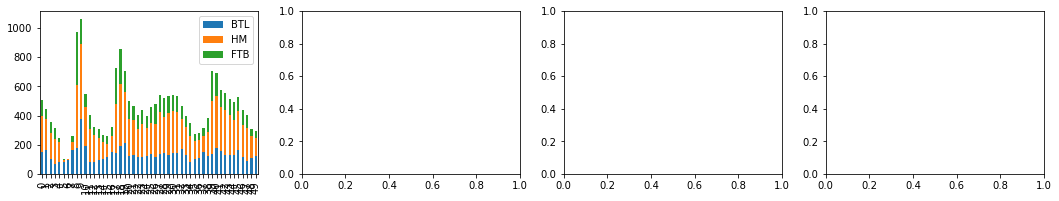

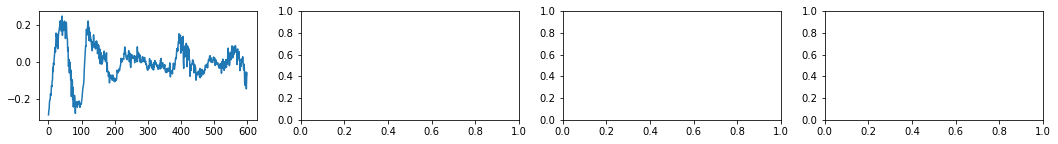

In [44]:
fig, axes = plt.subplots(figsize=(18,3), ncols=4, nrows=1)

sectors_40.plot.bar(stacked=True, ax=axes[0])

fig3, axes3 = plt.subplots(figsize=(18,2), ncols=4, nrows=1)
sale_cycle.plot(ax=axes3[0])

<AxesSubplot:>

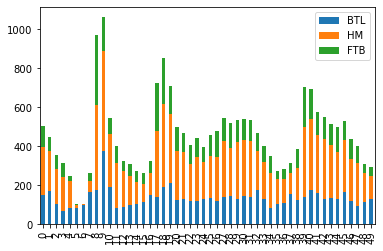

In [45]:
sectors_40.plot.bar(stacked=True)

In [46]:
sectors_40

,BTL,HM,FTB
0,148.0,249.0,106.0
1,167.0,206.0,72.0
2,105.0,177.0,73.0
3,67.0,175.0,71.0
4,80.0,139.0,25.0
5,82.0,16.0,4.0
6,96.0,5.0,1.0
7,166.0,56.0,40.0
8,176.0,436.0,358.0
9,374.0,514.0,174.0


In [47]:

mortgage_hm40 = pd.DataFrame(np.zeros((3601,3)), columns=['nMortgages', 'mortgageSum', 'averageMortgage'])


loan_hm40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == False) & (saleTransaction40.mortgagePrincipal != 0)]

loan_hm40


c_modelTime = -1  
sum_ = 0

for index,row in loan_hm40.iterrows():
    if (row['modelTime'] == c_modelTime):
        sum_ += row['mortgagePrincipal']
    else: 
        
        if (c_modelTime != -1):
            
            mortgage_hm40.loc[[row['modelTime']],['mortgageSum']] = sum_
            
            sum_ = 0
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            sum_ += row['mortgagePrincipal']


cut_loan_hm40 = mortgage_hm40.iloc[3001:3601]
    
cut_loan_hm40

,nMortgages,mortgageSum,averageMortgage
3001,0.0,325856.31,0.0
3002,0.0,336949.68,0.0
3003,0.0,755213.17,0.0
3004,0.0,1551296.92,0.0
3005,0.0,488245.33,0.0
...,...,...,...
3596,0.0,0.00,0.0
3597,0.0,0.00,0.0
3598,0.0,0.00,0.0
3599,0.0,0.00,0.0


In [48]:
for i in range(0, 600):
    n = cut_loan40.loc[i + 3001]['loan']
    cut_loan_hm40.loc[i + 3001]['nMortgages'] = n
    cut_loan_hm40.loc[i + 3001]['averageMortgage'] = cut_loan_hm40.loc[i + 3001]['mortgageSum'] / n
    
cut_loan_hm40

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/556524968.py:4: RuntimeWarning: invalid value encountered in double_scalars
  cut_loan_hm40.loc[i + 3001]['averageMortgage'] = cut_loan_hm40.loc[i + 3001]['mortgageSum'] / n


,nMortgages,mortgageSum,averageMortgage
3001,4.0,325856.31,81464.077500
3002,4.0,336949.68,84237.420000
3003,6.0,755213.17,125868.861667
3004,12.0,1551296.92,129274.743333
3005,5.0,488245.33,97649.066000
...,...,...,...
3596,0.0,0.00,NaN
3597,0.0,0.00,NaN
3598,0.0,0.00,NaN
3599,0.0,0.00,NaN


<AxesSubplot:>

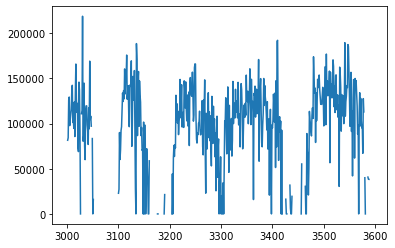

In [49]:
cut_loan_hm40.reset_index()
cut_loan_hm40[:]['averageMortgage'].plot()

In [50]:


mortgage_ftb40 = pd.DataFrame(np.zeros((3601,3)), columns=['nMortgages', 'mortgageSum', 'averageMortgage'])


loan_ftb40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == False) & 
                (saleTransaction40.firstTimeBuyerMortgage == True) & (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1  
sum_ = 0

for index,row in loan_ftb40.iterrows():
    if (row['modelTime'] == c_modelTime):
        sum_ += row['mortgagePrincipal']
    else: 
        if (c_modelTime != -1):
            mortgage_ftb40.loc[[row['modelTime']],['mortgageSum']] = sum_
           
            sum_ = 0
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime']
            sum_ += row['mortgagePrincipal']


cut_loan_ftb40 = mortgage_ftb40.iloc[3001:3601]
    
for i in range(0, 600):
    n = ftb_40.loc[i + 3001]['loan']
    cut_loan_ftb40.loc[i + 3001]['nMortgages'] = n
    cut_loan_ftb40.loc[i + 3001]['averageMortgage'] = cut_loan_ftb40.loc[i + 3001]['mortgageSum'] / n
    


/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/2345932121.py:30: RuntimeWarning: invalid value encountered in double_scalars
  cut_loan_ftb40.loc[i + 3001]['averageMortgage'] = cut_loan_ftb40.loc[i + 3001]['mortgageSum'] / n


In [51]:
# btl

mortgage_btl40 = pd.DataFrame(np.zeros((3601,3)), columns=['nMortgages', 'mortgageSum', 'averageMortgage'])


loan_btl40 = saleTransaction40[(saleTransaction40.buyerHasBTLGene == True) & 
                 (saleTransaction40.mortgagePrincipal != 0)]


c_modelTime = -1  
sum_ = 0

for index,row in loan_btl40.iterrows():
    if (row['modelTime'] == c_modelTime):
        sum_ += row['mortgagePrincipal']
    else: 
        if (c_modelTime != -1):
         
            mortgage_btl40.loc[[row['modelTime']],['mortgageSum']] = sum_
            
            sum_ = 0
            c_modelTime = row['modelTime']
        else:
            c_modelTime = row['modelTime'] 
            sum_ += row['mortgagePrincipal']


cut_loan_btl40 = mortgage_btl40.iloc[3001:3601]
    
for i in range(0, 600):
    n = btl_40.loc[i + 3001]['loan']
    cut_loan_btl40.loc[i + 3001]['nMortgages'] = n
    cut_loan_btl40.loc[i + 3001]['averageMortgage'] = cut_loan_btl40.loc[i + 3001]['mortgageSum'] / n
    

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_54521/2165009783.py:33: RuntimeWarning: invalid value encountered in double_scalars
  cut_loan_btl40.loc[i + 3001]['averageMortgage'] = cut_loan_btl40.loc[i + 3001]['mortgageSum'] / n


In [53]:
names = locals()
mortgage_total40 = pd.DataFrame(np.zeros((600,3)), columns=['mortgageSum', 'mortgageNum', 'avergeSize'])

simulations = [40]

for j in range(0,1):
    
    for i in range(0,600):
        nSum = cut_loan_hm40.loc[i + 3001]['nMortgages'] + cut_loan_ftb40.loc[i + 3001]['nMortgages']+ cut_loan_btl40.loc[i + 3001]['nMortgages']
            
        nMoney = cut_loan_hm40.loc[i + 3001]['mortgageSum'] + cut_loan_ftb40.loc[i + 3001]['mortgageSum']+ cut_loan_btl40.loc[i + 3001]['mortgageSum']
            
        naverage = nMoney / nSum
        
        names['mortgage_total' + str(simulations[j])].loc[i] = [nMoney, nSum, naverage]

<AxesSubplot:title={'center':'Mortgage Size Variation when LTV = 80%'}>

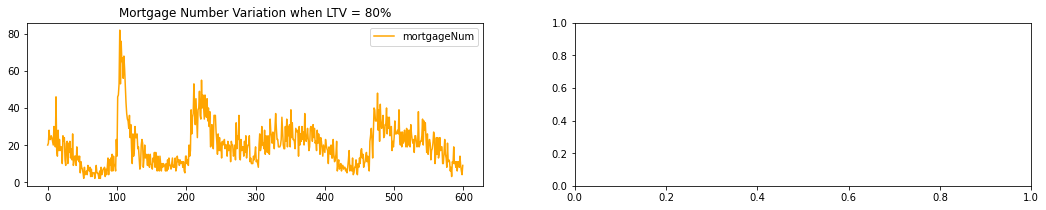

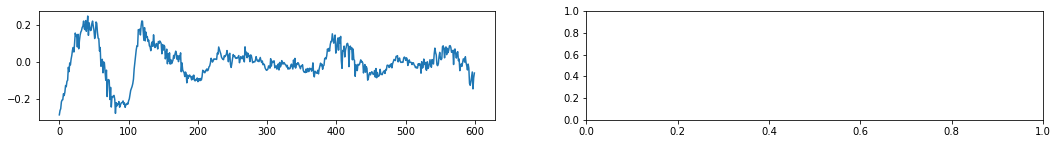

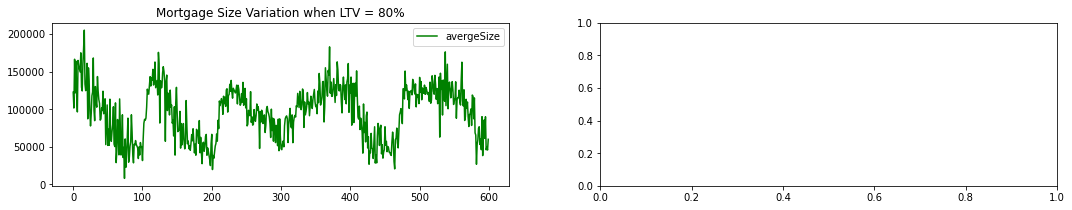

In [54]:
fig2, axes2 = plt.subplots(figsize=(18,3), ncols=2,nrows=1)

mortgage_total40[['mortgageNum']][:].plot(ax=axes2[0], color='orange', title='Mortgage Number Variation when LTV = 80%')

#mortgage_total30[['mortgageNum']][:].plot(ax=axes2[1],color='orange')

#mortgage_total2[['avergeSize']][:].plot(ax=axes2[2],color='red')

#mortgage_total7[['avergeSize']][:].plot(ax=axes2[3],color='red')


fig3, axes3 = plt.subplots(figsize=(18,2), ncols=2, nrows=1)
sale_cycle.plot(ax=axes3[0])
#sale_cycle30.plot(ax=axes3[1])
#sale_cycle2.plot(ax=axes3[2])
#sale_cycle7.plot(ax=axes3[3])


fig, axes = plt.subplots(figsize=(18,3), ncols=2,nrows=1)

mortgage_total40[['avergeSize']][:].plot(ax=axes[0], color='green',title='Mortgage Size Variation when LTV = 80%')

#mortgage_total30[['avergeSize']][:].plot(ax=axes[1],color='green')

#mortgage_total2[['avergeSize']][:].plot(ax=axes[2],color='red')

#mortgage_total7[['avergeSize']][:].plot(ax=axes[3],color='red')



In [55]:


btlLTV = pd.DataFrame()

count = 0
with open('./LTI_SOFT/2023-08-16T04-19-11.779541Z/coreIndicator-btlLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        #print(len(row))
        btlLTV[str(count)] = np.float_(row)
        count += 1
        #for i in range(0, len(row)):
            #btlLTV.loc[i]=float(row[i])

btlLTV

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,66.6217,67.2795,68.0241,64.3908,66.4557,65.1015,65.5215,68.1120,67.6382,66.9969,...,66.3988,66.1194,66.6919,64.2410,67.7565,68.5962,65.8800,65.8945,63.9004,66.3855
1,66.4521,67.2795,68.0241,64.3908,66.2837,65.1015,65.5215,68.1120,67.4682,66.8369,...,66.0771,66.1194,66.6919,64.2410,67.5869,68.5962,65.5588,65.7350,63.5803,66.3855
2,66.5922,67.1042,67.9261,64.4154,66.3368,65.0947,65.7311,68.2551,67.3416,66.9640,...,66.0871,66.1309,66.5939,64.3282,67.4883,68.6662,65.6330,65.4045,63.6939,66.0471
3,66.3818,67.1295,67.9634,64.4040,65.7658,65.0947,65.8038,68.2893,67.3881,66.9934,...,65.9859,66.0519,66.6310,64.3420,67.2646,68.6213,65.6905,65.4919,63.8128,65.9031
4,66.4644,67.1490,68.0077,64.4042,65.8001,65.0625,65.8344,68.3297,67.2858,67.0831,...,65.9654,66.0906,66.6178,64.3827,67.3403,68.6412,65.7457,65.4407,63.8545,65.7779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,56.3907,67.1366,52.6654,55.2994,59.3406,51.4841,44.1905,52.0944,56.4440,56.1126,...,58.8652,59.5698,55.5763,60.2489,58.6351,60.6330,49.3448,55.2174,58.4284,63.6621
3597,60.4447,65.3108,59.4400,55.8833,57.2843,52.6139,45.0333,51.8148,55.4438,56.1009,...,60.8872,61.6196,54.3844,59.7696,59.6731,60.5685,50.5003,53.8363,57.9637,61.6684
3598,60.1819,65.7419,60.4334,57.6977,55.1839,55.9030,44.6872,54.8707,56.9837,52.8938,...,60.0477,62.8328,53.8348,60.6592,59.1697,58.6621,50.3733,55.2744,56.9293,61.3331
3599,59.1736,60.7548,58.4819,59.0059,56.9510,51.4530,44.5704,55.7290,61.9349,53.9433,...,60.0598,55.4549,52.3195,61.4507,58.0164,54.1194,53.8932,56.6868,51.9260,62.7050


In [56]:
cut_btlLTV = btlLTV.iloc[3001:3601].reset_index()

cut_btlLTV

,index,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,3001,60.7441,57.8337,51.5474,59.7912,50.8821,54.0323,61.0048,53.0757,57.5207,...,56.3856,59.1340,61.3691,59.1286,57.5819,52.1261,52.3193,45.1391,54.4903,57.8829
1,3002,60.9240,60.5260,56.5734,60.0647,52.0971,58.4252,59.5940,53.3510,56.2419,...,54.4803,60.6553,60.8512,60.9743,55.2954,53.8351,50.3872,43.7834,50.6699,61.5612
2,3003,61.9219,60.3008,59.1884,62.1875,52.0069,54.5147,55.2209,55.5460,58.7333,...,56.5422,60.5983,58.1250,59.9459,55.8527,53.1097,47.8150,42.8873,46.5169,59.4571
3,3004,64.9150,58.1482,57.8695,61.9335,53.1660,54.6986,55.6273,55.0982,57.0144,...,53.6581,59.5743,62.6313,59.5437,56.0198,54.9119,47.2564,44.8328,48.8780,59.8881
4,3005,61.7083,58.8225,61.5007,63.5799,54.2083,52.1481,56.5879,54.3019,59.9663,...,56.9720,55.5859,60.3537,57.0540,53.2242,57.3699,48.7943,44.1157,48.3232,59.3767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3596,56.3907,67.1366,52.6654,55.2994,59.3406,51.4841,44.1905,52.0944,56.4440,...,58.8652,59.5698,55.5763,60.2489,58.6351,60.6330,49.3448,55.2174,58.4284,63.6621
596,3597,60.4447,65.3108,59.4400,55.8833,57.2843,52.6139,45.0333,51.8148,55.4438,...,60.8872,61.6196,54.3844,59.7696,59.6731,60.5685,50.5003,53.8363,57.9637,61.6684
597,3598,60.1819,65.7419,60.4334,57.6977,55.1839,55.9030,44.6872,54.8707,56.9837,...,60.0477,62.8328,53.8348,60.6592,59.1697,58.6621,50.3733,55.2744,56.9293,61.3331
598,3599,59.1736,60.7548,58.4819,59.0059,56.9510,51.4530,44.5704,55.7290,61.9349,...,60.0598,55.4549,52.3195,61.4507,58.0164,54.1194,53.8932,56.6868,51.9260,62.7050


In [57]:
cut_btlLTV['40'][:].mean()

57.69553500000001

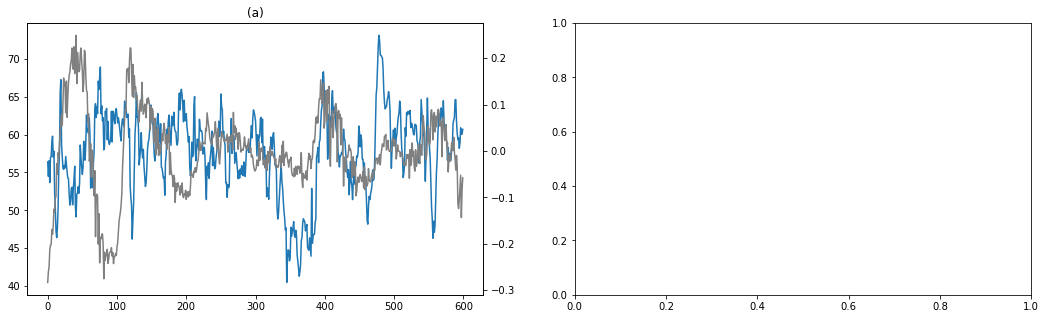

In [62]:
fig, axes = plt.subplots(figsize=(18,5), ncols=2,nrows=1)

cut_btlLTV[['40']][:].plot(ax=axes[0], title='(a)',legend=False, zorder=5)

ax1 = axes[0].twinx()
ax1.plot(range(0,600),sale_cycle, color='grey')


In [63]:
cut_btlLTV['40'][:]

0      56.3856
1      54.4803
2      56.5422
3      53.6581
4      56.9720
        ...   
595    58.8652
596    60.8872
597    60.0477
598    60.0598
599    60.6841
Name: 40, Length: 600, dtype: float64

In [64]:


ooLTV = pd.DataFrame()

count = 0
with open('./LTI_SOFT/2023-08-16T04-19-11.779541Z/coreIndicator-ooLTV.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        #print(len(row))
        ooLTV[str(count)] = np.float_(row)
        count += 1
        #for i in range(0, len(row)):
            #btlLTV.loc[i]=float(row[i])

ooLTV

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,77.4533,78.2858,78.8642,77.8959,79.9003,79.9552,79.3034,79.5264,81.1827,78.5684,...,79.1387,79.5615,80.2130,79.6902,77.9656,80.2150,79.7329,79.2964,79.6381,78.3550
1,77.1537,77.9795,78.4859,77.6200,79.6277,79.6009,78.9317,79.4902,80.7861,78.1805,...,78.8608,79.2372,79.8751,79.3339,77.7905,80.0362,79.6584,79.0697,79.2951,78.2492
2,76.4372,77.1046,77.4728,77.1133,78.8627,78.9204,78.1394,78.3980,80.1714,77.9141,...,78.3604,78.1893,79.1185,78.9146,77.3332,79.3550,79.0661,78.4495,78.4790,77.6775
3,76.2907,76.6314,77.1955,76.3079,78.5266,78.7025,77.8370,78.0578,79.4735,77.9363,...,78.0320,78.0617,78.8356,78.6097,76.8416,78.8576,78.5371,78.0730,77.9735,77.4925
4,76.0792,76.6628,77.0042,75.9914,78.3718,78.4233,78.1437,77.7685,79.5166,77.7845,...,77.9962,77.8606,78.7215,78.2360,76.4713,79.0034,78.5621,77.7931,78.2640,77.3182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,79.1279,87.0968,83.4934,83.3908,83.7355,83.2925,77.6495,83.2092,74.4937,88.9613,...,77.0763,74.8170,83.0512,80.4262,77.3267,78.9836,81.2826,82.4706,80.6571,81.1481
3597,77.9364,87.7775,83.8376,81.3226,82.9994,82.9010,77.0761,81.8620,68.1474,88.7806,...,76.3035,77.9535,82.5934,79.3091,78.7339,79.9130,81.5452,83.0322,79.6289,81.4560
3598,80.8672,85.6299,83.7064,82.5332,81.1834,82.9301,76.9764,82.5342,69.4132,88.6755,...,76.7530,77.5950,82.7331,79.4679,79.1253,78.9500,80.8344,81.4688,79.2999,81.0860
3599,87.3710,87.1482,83.3398,83.4645,80.9264,82.7141,74.4549,81.1519,71.1625,88.3877,...,78.3650,77.3352,82.8243,78.7528,79.6628,79.8531,81.5420,82.0020,79.2281,80.4042


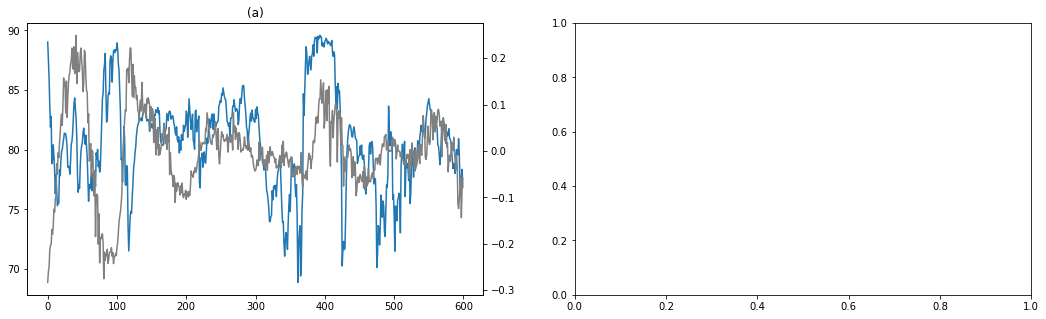

In [68]:
cut_ooLTV = ooLTV.iloc[3001:3601].reset_index()


fig, axes = plt.subplots(figsize=(18,5), ncols=2,nrows=1)

cut_ooLTV[['40']][:].plot(ax=axes[0], title='(a)',legend=False, zorder=5)

ax1 = axes[0].twinx()
ax1.plot(range(0,600),sale_cycle, color='grey')


In [69]:
cut_ooLTV['40'][350]

74.8227

<AxesSubplot:>

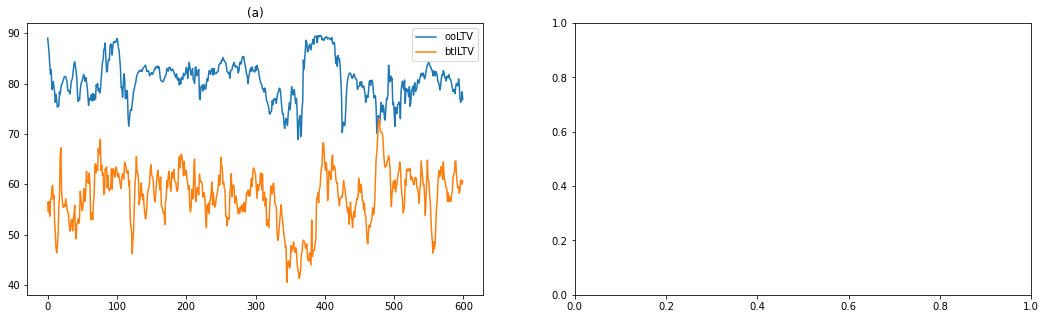

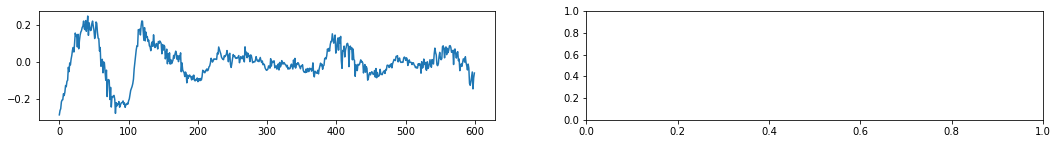

In [71]:
fig, axes = plt.subplots(figsize=(18,5), ncols=2,nrows=1)

cut_ooLTV[['40']][:].plot(ax=axes[0], title='(a)')
cut_btlLTV[['40']][:].plot(ax=axes[0])
axes[0].legend(['ooLTV', 'btlLTV'])

fig2, axes2 = plt.subplots(figsize=(18,2), ncols=2,nrows=1)
sale_cycle.plot(ax=axes2[0])


In [72]:


ooLTI = pd.DataFrame()

count = 0
with open('./LTI_SOFT/2023-08-16T04-19-11.779541Z/coreIndicator-ooLTI.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        #print(len(row))
        ooLTI[str(count)] = np.float_(row)
        count += 1
        #for i in range(0, len(row)):
            #btlLTV.loc[i]=float(row[i])


cut_ooLTI = ooLTI.iloc[3001:3601].reset_index()

In [73]:
cut_ooLTI['40'][350]

4.1226